C:\Users\jonas\AppData\Local\Temp\ipykernel_32084\667865940.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat({model: df for model, df in dfs.items()}, names=["Model", "Index"]).reset_index(level=0)


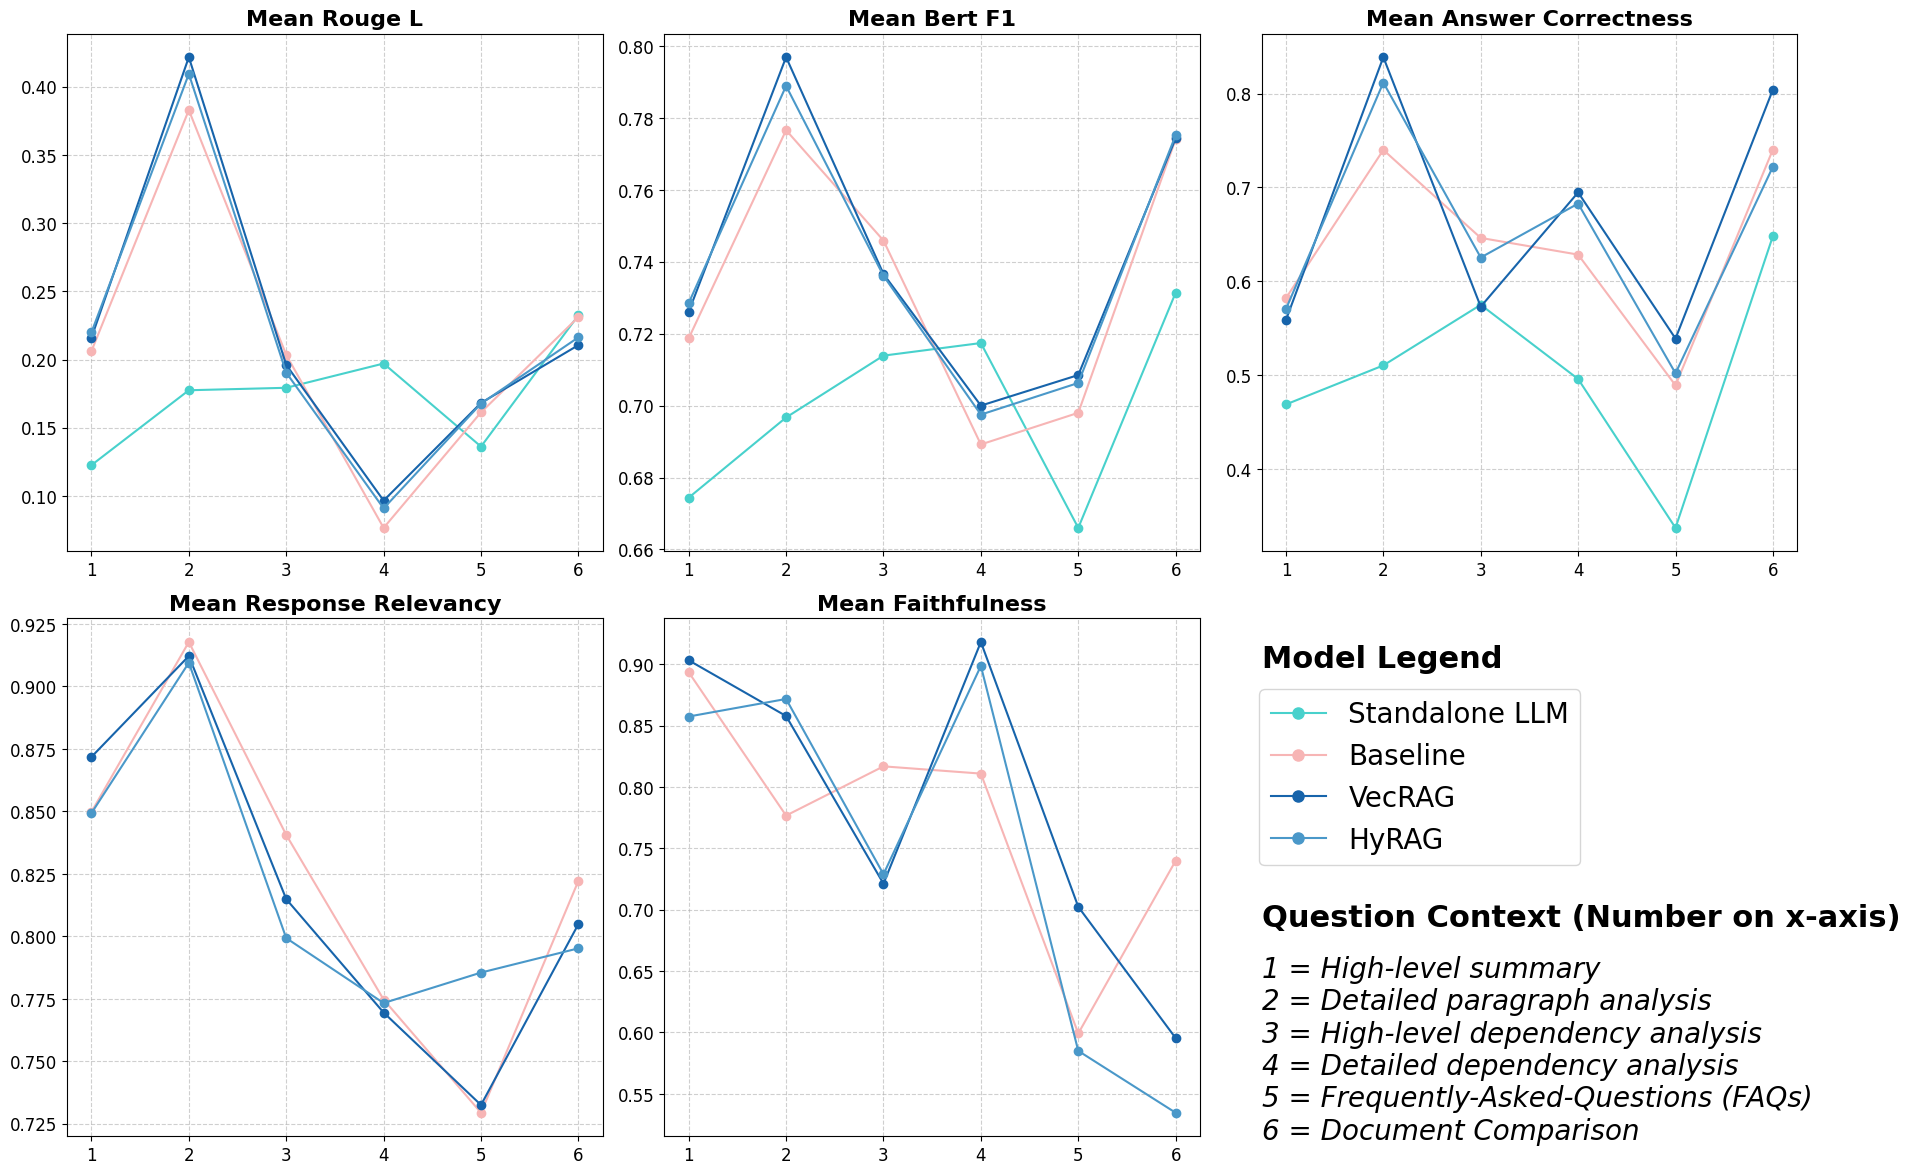

In [ ]:
# Code Generated with the help of ChatGPT

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

BASELINE_COLOR = "#F7B5B5"
BLUE_COLORS = plt.cm.Blues(np.linspace(0.4, 0.8, 3))

# Data preparation
data = {
    "Standalone LLM": [
        ["High-level summary", 0.1226, 0.6744, 0.4687, None, None],
        ["Detailed paragraph analysis", 0.1775, 0.6967, 0.5103, None, None],
        ["High-level dependency analysis", 0.1793, 0.7139, 0.5749, None, None],
        ["Detailed dependency analysis", 0.1971, 0.7174, 0.4958, None, None],
        ["Frequently-Asked-Questions (FAQs)", 0.1362, 0.666, 0.3371, None, None],
        ["Document Comparison", 0.2325, 0.7314, 0.6482, None, None]
    ],
    "Baseline": [
        ["High-level summary", 0.2062, 0.7187, 0.582, 0.8498, 0.8935],
        ["Detailed paragraph analysis", 0.3829, 0.7766, 0.74, 0.9178, 0.7767],
        ["High-level dependency analysis", 0.2034, 0.7459, 0.6462, 0.8406, 0.8168],
        ["Detailed dependency analysis", 0.0766, 0.6892, 0.6284, 0.7747, 0.8109],
        ["Frequently-Asked-Questions (FAQs)", 0.1613, 0.698, 0.489, 0.7294, 0.5992],
        ["Document Comparison", 0.2312, 0.7741, 0.7404, 0.8222, 0.7399]
    ],
    "VecRAG": [
        ["High-level summary", 0.216, 0.7261, 0.5587, 0.8718, 0.9032],
        ["Detailed paragraph analysis", 0.4217, 0.7969, 0.8389, 0.9122, 0.8578],
        ["High-level dependency analysis", 0.1961, 0.7366, 0.5729, 0.8149, 0.7212],
        ["Detailed dependency analysis", 0.0966, 0.7, 0.6947, 0.7695, 0.9181],
        ["Frequently-Asked-Questions (FAQs)", 0.1682, 0.7085, 0.5389, 0.7325, 0.7024],
        ["Document Comparison", 0.2106, 0.7743, 0.8043, 0.8049, 0.5954]
    ],
    "HyRAG": [
        ["High-level summary", 0.2199, 0.7285, 0.5704, 0.8493, 0.8574],
        ["Detailed paragraph analysis", 0.4094, 0.7889, 0.8118, 0.9095, 0.8717],
        ["High-level dependency analysis", 0.1904, 0.7361, 0.6253, 0.7993, 0.7289],
        ["Detailed dependency analysis", 0.0909, 0.6975, 0.6828, 0.7733, 0.8986],
        ["Frequently-Asked-Questions (FAQs)", 0.1677, 0.7063, 0.5019, 0.7855, 0.5850],
        ["Document Comparison", 0.2163, 0.7752, 0.7221, 0.7952, 0.5346]
    ]
}

# Convert to DataFrame
metrics = ["question_context", "mean_rouge_L", "mean_bert_f1", "mean_answer_correctness", "mean_response_relevancy", "mean_faithfulness"]
dfs = {model: pd.DataFrame(rows, columns=metrics) for model, rows in data.items()}
df_all = pd.concat({model: df for model, df in dfs.items()}, names=["Model", "Index"]).reset_index(level=0)

# Mapping für X-Achsen-Beschriftung
context_labels = {
    1: "High-level summary",
    2: "Detailed paragraph analysis",
    3: "High-level dependency analysis",
    4: "Detailed dependency analysis",
    5: "Frequently-Asked-Questions (FAQs)",
    6: "Document Comparison"
}

# Pyramiden-Plot
def plot_all_metrics_pyramid():
    plot_metrics = [
        "mean_rouge_L",
        "mean_bert_f1",
        "mean_answer_correctness",
        "mean_response_relevancy",
        "mean_faithfulness"
    ]
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    positions = [0, 1, 2, 3, 4, "legend"]
    colors = {
        "Standalone LLM": "mediumturquoise",
        "Baseline": BASELINE_COLOR,
        "VecRAG": BLUE_COLORS[2],
        "HyRAG": BLUE_COLORS[1]
    }
    
    for idx, pos in enumerate(positions):
        ax = axes[idx]
        
        if pos == "legend":
            ax.axis("off")
            handles = [
                plt.Line2D([0], [0], color=colors[model], marker="o", linestyle='-', markersize=8)
                for model in df_all["Model"].unique()
            ]
            labels = list(df_all["Model"].unique())
            ax.text(0, 0.95, "Model Legend", fontsize=22, fontweight="bold", va="top")
            ax.legend(handles, labels, loc="upper left", bbox_to_anchor=(-0.03, 0.89), fontsize=20)
            ax.text(0, 0.45, "Question Context (Number on x-axis)", fontsize=22, fontweight="bold", va="top")
            legend_text = "\n".join([f"{k} = {v}" for k, v in context_labels.items()])
            ax.text(0, 0.35, legend_text, fontsize=20, va="top", fontstyle="italic")
            continue
        
        metric_name = plot_metrics[pos]
        metric_title = metric_name.replace("_", " ").title()
        for model in df_all["Model"].unique():
            ax.plot(
                range(1, 7),
                df_all[df_all["Model"] == model][metric_name],
                marker="o",
                label=model,
                color=colors[model]
            )
        ax.set_title(metric_title, fontsize=16, fontweight="bold")
        ax.set_xticks(range(1, 7))
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.set_xlabel("")  # X-Achsenbeschriftung entfernen
        ax.set_ylabel("")  # Y-Achsenbeschriftung entfernen
        ax.grid(True, linestyle="--", alpha=0.6)
    
    plt.tight_layout()
    plt.savefig("visualization_generation_metrics_per_question_context.png", dpi=300, bbox_inches='tight')
    plt.show()

# Aufruf
plot_all_metrics_pyramid()
